1. <a> Read the dataset</a>
2. <a >Data investigation</a>
3. <a >Data preprocessing </a>




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

The data set from this link https://www.kaggle.com/fernandol/countries-of-the-world


In [2]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [5]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Numerical data defined as "Object" since the floating point is ',' instead of '.'          <br>
2- Missing (NANs) Data          <br>
3- Outliers and skewness          <br>

In [6]:
#make a copy for the original dataset
df_cleaned = df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution on the data
- test the solution to make sure that you have solved the issue

**First issue**

In [ ]:
#solution
objs = df_cleaned.select_dtypes(include='object').columns.drop(['Country', 'Region'])

for col in objs:
    df_cleaned[col] = df_cleaned[col].astype(str).str.replace(',', '.')
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

In [8]:
#test 
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

**Second issue**

In [9]:
df_cleaned.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [11]:
#solution 
for name, col in df_cleaned.select_dtypes(include=['float64', 'int64']).items():
    df_cleaned[name].fillna(col.median(), inplace=True)

In [12]:
#test 
df_cleaned.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

**Third issue**

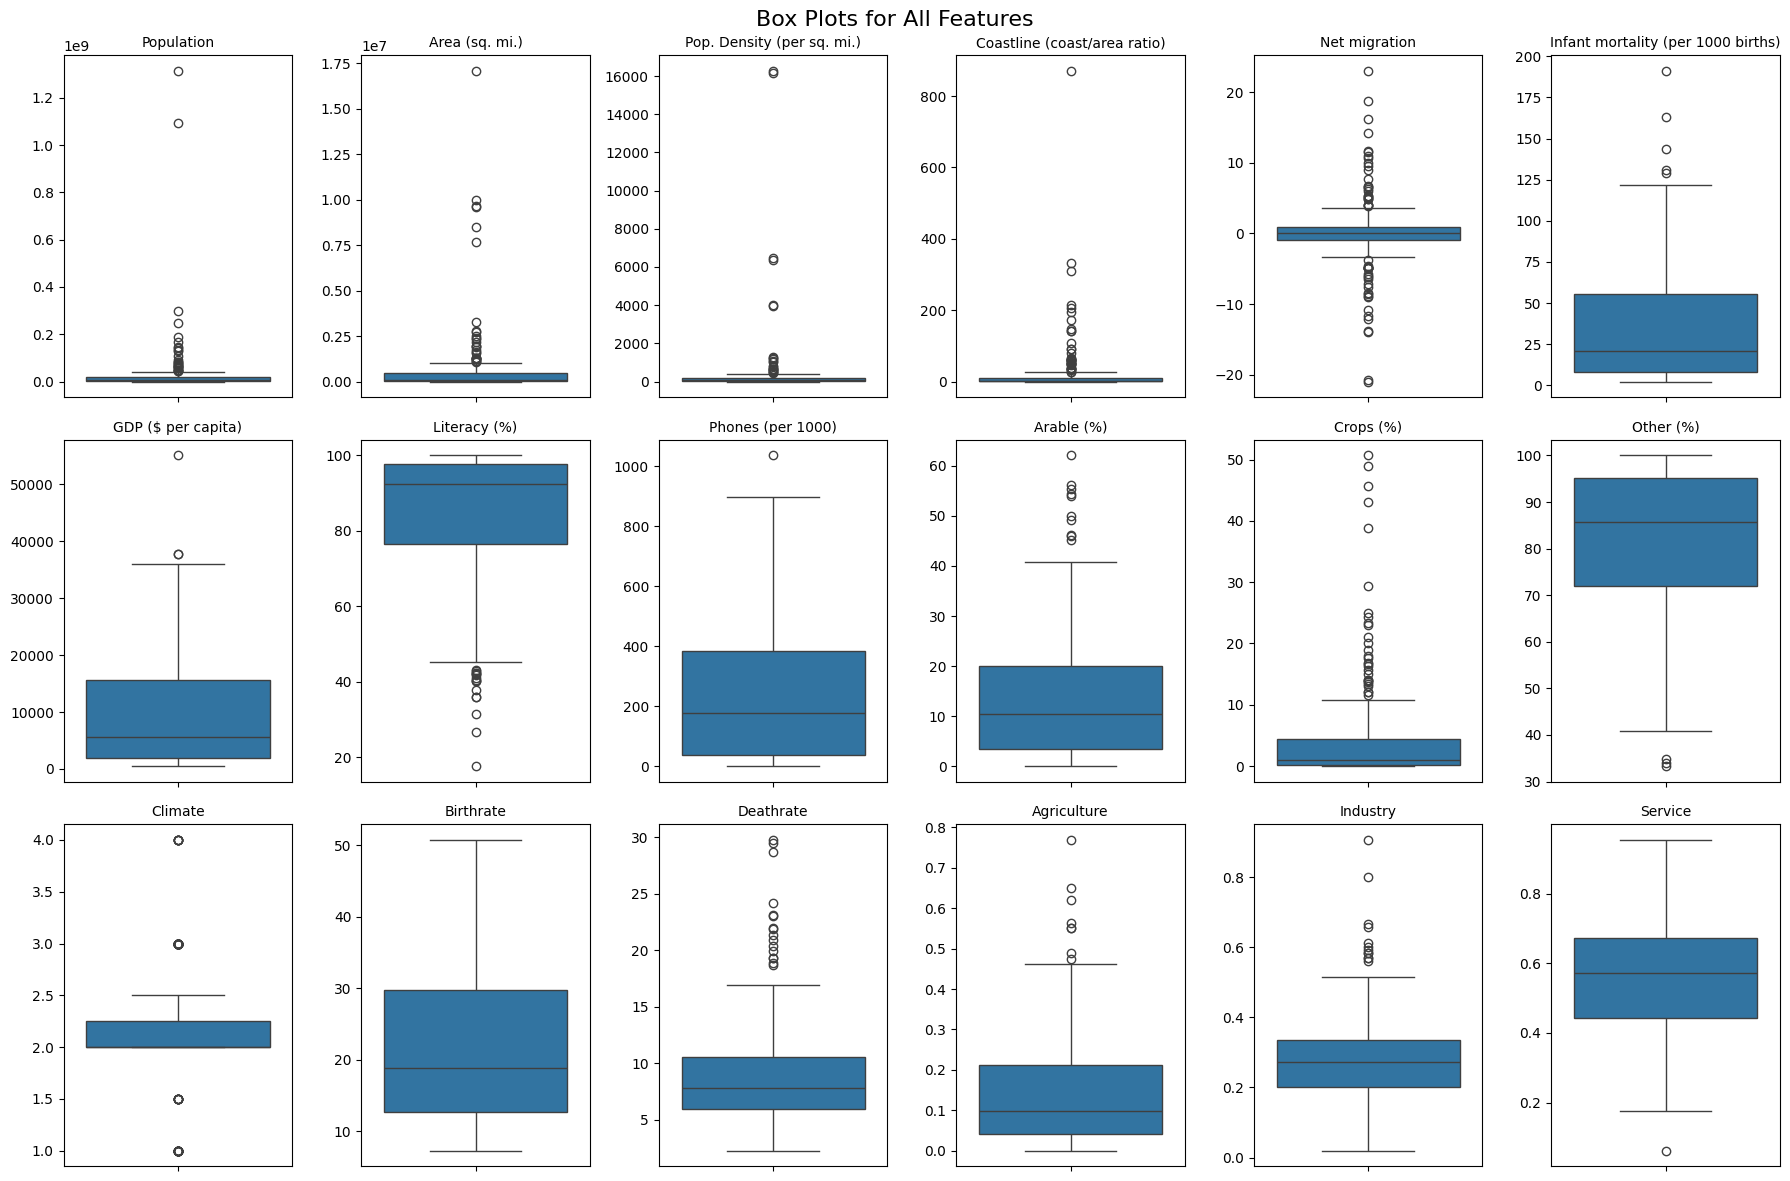

In [ ]:
import seaborn as sns
highly_skewed_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.to_list()

fig, axes = plt.subplots(3, 6, figsize=(18, 12))
fig.suptitle('Box Plots for All Features', fontsize=16)
axes = axes.flatten()

for i, col in enumerate(highly_skewed_cols):
    sns.boxplot(y=df_cleaned[col], ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].set_ylabel('')

plt.tight_layout()

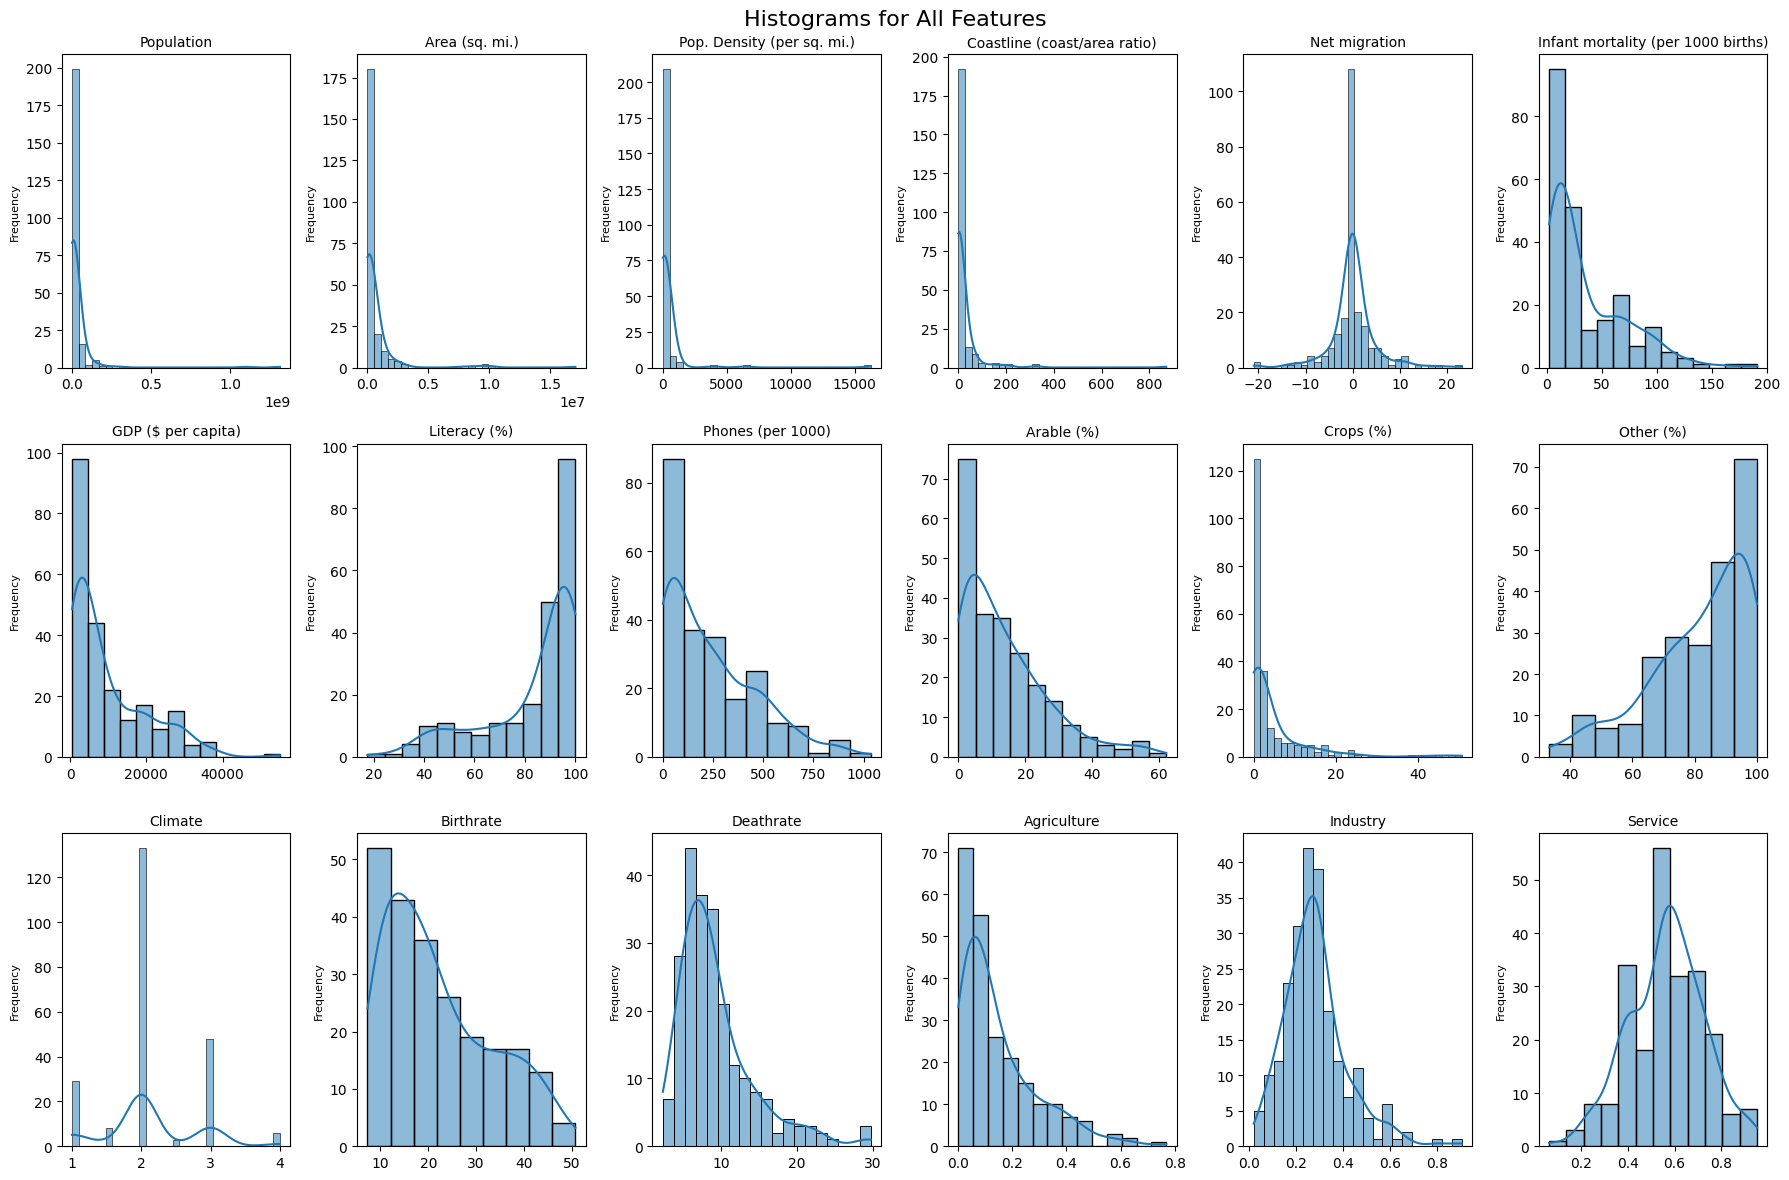

In [23]:
fig, axes = plt.subplots(3, 6, figsize=(18, 12))
fig.suptitle('Histograms for All Features', fontsize=16)
axes = axes.flatten()

for i, col in enumerate(highly_skewed_cols):
    sns.histplot(df_cleaned[col], kde=True, ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency', fontsize=8)

plt.tight_layout()

In [33]:
df_cleaned.select_dtypes(include=['float64', 'int64']).skew()

Population                            9.200223
Area (sq. mi.)                        5.964245
Pop. Density (per sq. mi.)            8.284886
Coastline (coast/area ratio)          8.221680
Net migration                         0.128555
Infant mortality (per 1000 births)    1.450106
GDP ($ per capita)                    1.382561
Literacy (%)                         -1.343973
Phones (per 1000)                     1.036936
Arable (%)                            1.346144
Crops (%)                             3.242298
Other (%)                            -0.966313
Climate                               0.426545
Birthrate                             0.722981
Deathrate                             1.678308
Agriculture                           1.518833
Industry                              1.156335
Service                              -0.148749
dtype: float64

In [37]:
skewed= abs(df_cleaned.select_dtypes(include=['float64', 'int64']).skew()) > 1
highly_skewed_cols = skewed[skewed].index.tolist()
highly_skewed_cols

['Population',
 'Area (sq. mi.)',
 'Pop. Density (per sq. mi.)',
 'Coastline (coast/area ratio)',
 'Infant mortality (per 1000 births)',
 'GDP ($ per capita)',
 'Literacy (%)',
 'Phones (per 1000)',
 'Arable (%)',
 'Crops (%)',
 'Deathrate',
 'Agriculture',
 'Industry']

In [38]:
#solution
df_normalized = df_cleaned.copy()
for col in highly_skewed_cols:
    df_normalized[col] = np.log1p(df_normalized[col])

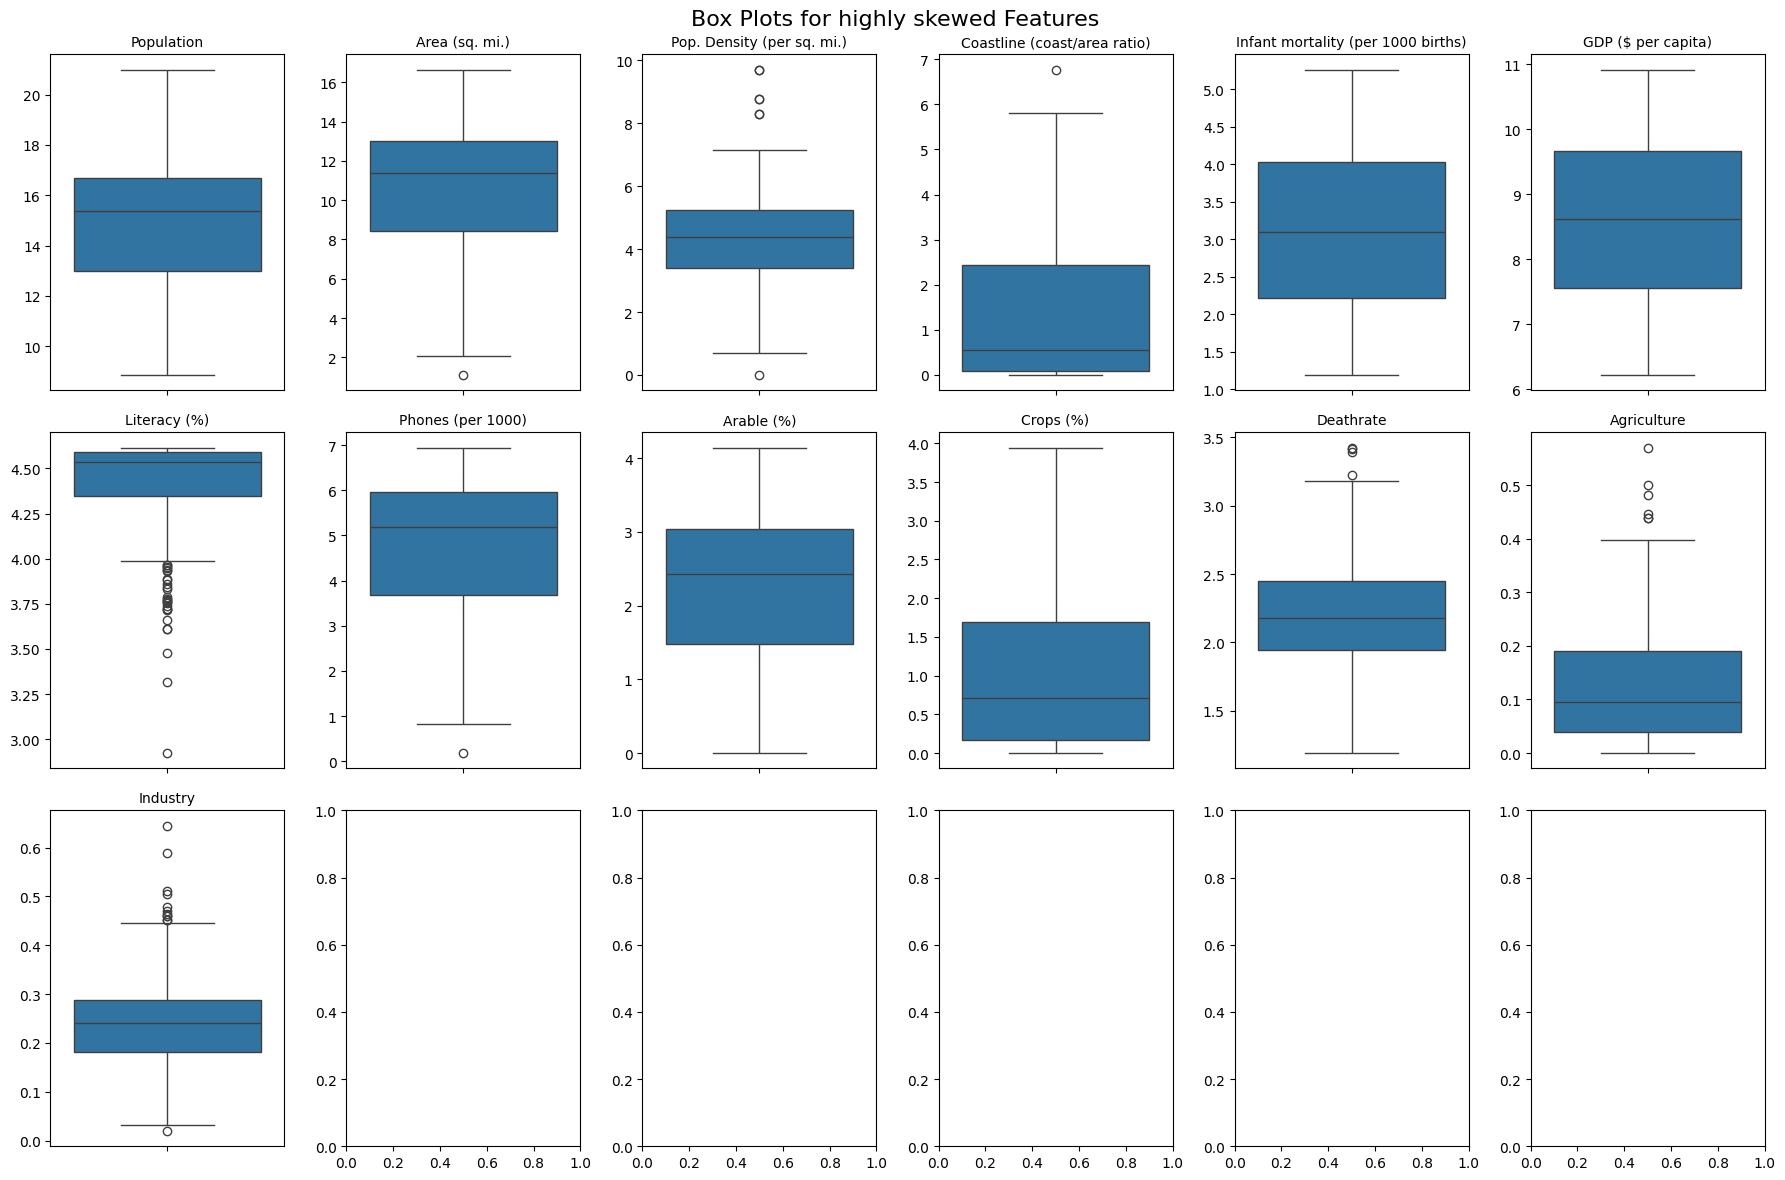

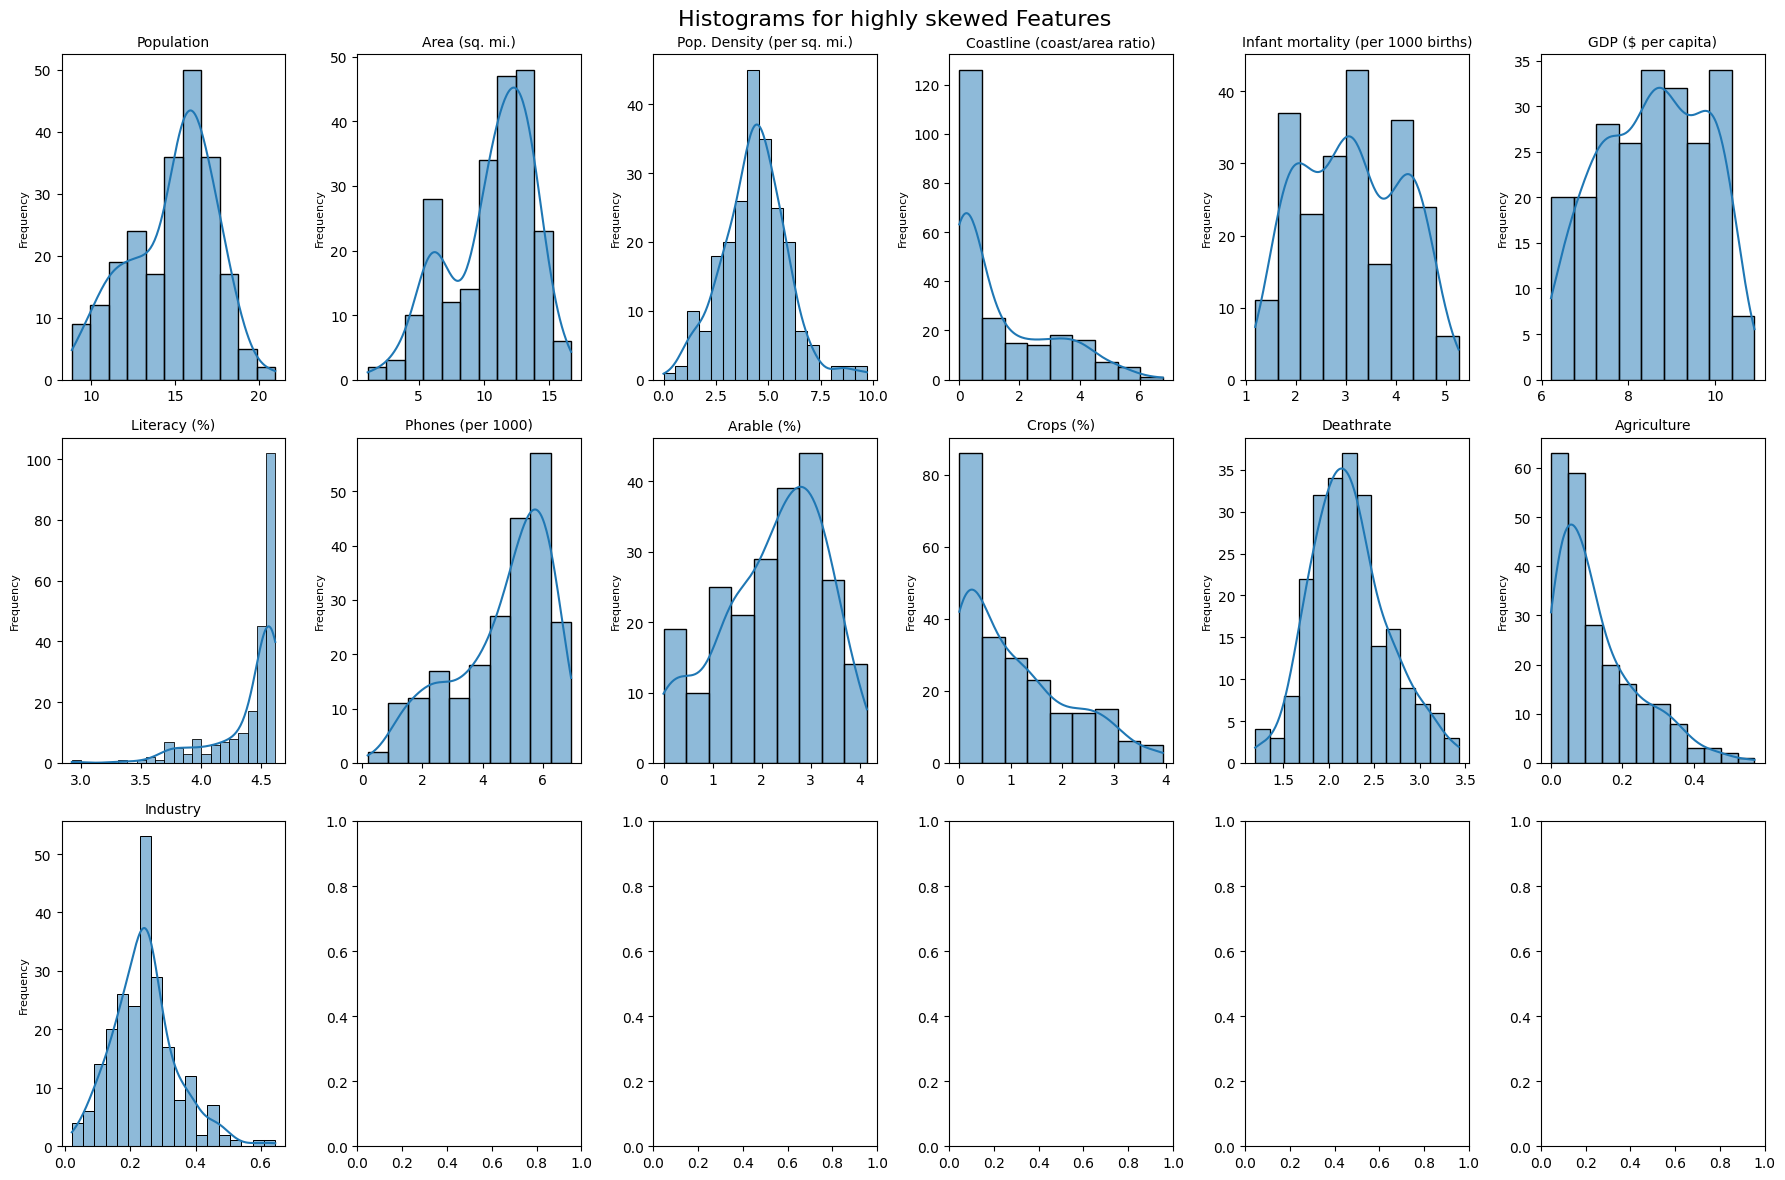

In [46]:
#test
fig, axes = plt.subplots(3, 6, figsize=(18, 12))
fig.suptitle('Box Plots for highly skewed Features', fontsize=16)
axes = axes.flatten()

for i, col in enumerate(highly_skewed_cols):
    sns.boxplot(y=df_normalized[col], ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].set_ylabel('')

plt.tight_layout()

fig, axes = plt.subplots(3, 6, figsize=(18, 12))
fig.suptitle('Histograms for highly skewed Features', fontsize=16)
axes = axes.flatten()

for i, col in enumerate(highly_skewed_cols):
    sns.histplot(df_normalized[col], kde=True, ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency', fontsize=8)

plt.tight_layout()